<a href="https://colab.research.google.com/github/karlinremian/Data-Mining/blob/main/Tugas__Dataset__heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasifikasi Penyakit Jantung dengan Naive Bayes (GaussianNB)



Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
dataset = pd.read_csv('heart.csv')  # memanggil dataset
x = dataset[['age', 'chol']].values  # ambil kolom 'age' dan 'chol' sebagai fitur
y = dataset['target'].values         # ambil kolom 'target' sebagai label

In [ ]:
print (x)

[[ 52 212]
 [ 53 203]
 [ 70 174]
 ...
 [ 47 275]
 [ 50 254]
 [ 54 188]]


In [ ]:
print (y)

[0 0 0 ... 0 1 0]


Spilt Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
print (x_train)

[[ 1.3756016   0.80373723]
 [-0.50461767 -0.90148382]
 [ 1.15439933  0.72442462]
 ...
 [ 1.15439933  0.72442462]
 [ 1.3756016  -0.16784221]
 [ 0.60139366 -1.1989061 ]]


In [ ]:
print (x_test)

[[-1.16822447 -0.24715481]
 [ 0.3801914   1.45806624]
 [ 0.93319706 -1.15924979]
 [ 0.3801914  -0.68337415]
 [ 0.7119948   0.28820528]
 [-0.17281427 -0.84199937]
 [ 0.3801914   1.08133135]
 [ 0.93319706  3.20294359]
 [ 0.26959026 -2.26962629]
 [-0.2834154  -0.30663927]
 [ 0.26959026 -0.32646742]
 [-0.39401654  1.04167505]
 [ 1.0437982  -0.68337415]
 [-0.72581994 -0.32646742]
 [-1.72123014  1.49772254]
 [ 0.60139366  1.43823808]
 [-1.50002787  1.20030026]
 [-0.94702221  1.29944102]
 [-1.38942674 -0.72303045]
 [ 0.49079253 -1.35753131]
 [-1.16822447 -0.50492079]
 [-0.83642107  0.22872083]
 [-1.50002787 -0.6238897 ]
 [-0.83642107  0.22872083]
 [ 0.60139366  1.43823808]
 [-0.61521881  0.50631495]
 [-1.72123014 -0.50492079]
 [-0.2834154  -0.82217121]
 [-0.06221314  1.16064396]
 [-1.16822447 -2.07134477]
 [-0.94702221 -0.82217121]
 [ 0.93319706  3.20294359]
 [-1.27882561 -1.35753131]
 [-1.38942674  0.38734604]
 [ 1.0437982   1.25978472]
 [ 0.60139366  0.72442462]
 [ 0.82259593 -0.02904514]
 

In [ ]:
print (y_train)

[0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 

In [ ]:
print (y_test)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1]



latih model naive_bayes dengan data training

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Predicting the test set result

In [ ]:
y_pred = classifier.predict(x_test)

making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[87 36]
 [56 78]]


In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_pred)
print ("Tingkat Akurasi : %d persen " % (akurasi*100))

Tingkat Akurasi : 64 persen 


<ipython-input-16-17cfee0454be>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


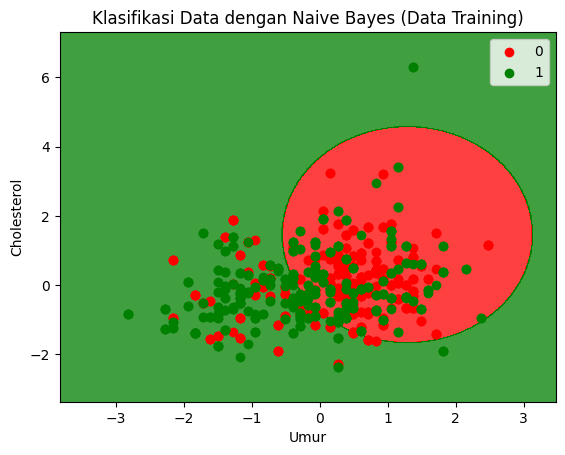

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

 menstandarkan data (scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

<ipython-input-18-2b88b639abcb>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


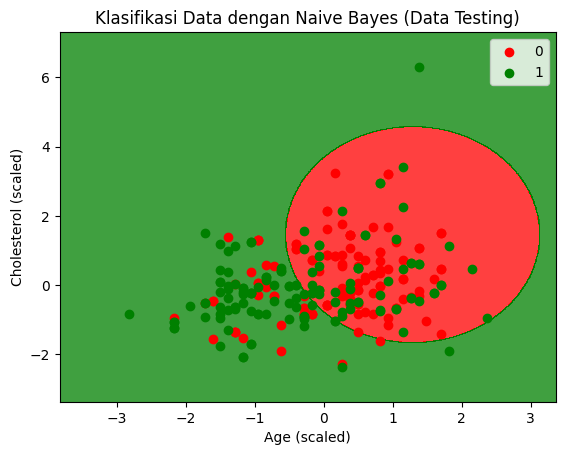

In [ ]:
from matplotlib.colors import ListedColormap

# Gunakan data test yang sudah discaling
x_set, y_set = x_test, y_test

# Membuat meshgrid
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1, step = 0.01))

# Buat decision boundary dari model
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Set batas sumbu
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot untuk data asli
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

# Label dan judul grafik
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Age (scaled)')
plt.ylabel('Cholesterol (scaled)')
plt.legend()
plt.show()